## План работы

[Шаг 1. Откроем файл с данными и изучим общую информацию](#1.)<br>
[Шаг 2. Предобработка и подготовка данных](#2.)<br>
[Шаг 2.1. Предобработка данных](#2.1.)<br>
[Шаг 2.2. Подготовка данных](#2.2.)<br>
[Шаг 3. Анализ данных](#3.)<br>
[Шаг 4. Проверка гипотез](#4.)<br>
[Шаг 5. Общий вывод](#5.)<br>

# Шаг 1. Откроем файл с данными и изучим общую информацию <a id = "1."> </a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# считываем датасеты, используемые для анализа
calls = pd.read_csv(r'E:\Документы прочие\IT\Яндекс практикум\Project\4 Статистический анализ данных\calls.csv', index_col=[0])
internet = pd.read_csv(r'E:\Документы прочие\IT\Яндекс практикум\Project\4 Статистический анализ данных\internet.csv', index_col=[0])
messages = pd.read_csv(r'E:\Документы прочие\IT\Яндекс практикум\Project\4 Статистический анализ данных\messages.csv', index_col=[0])
tariffs = pd.read_csv(r'E:\Документы прочие\IT\Яндекс практикум\Project\4 Статистический анализ данных\tariffs.csv', index_col=[0])
users = pd.read_csv(r'E:\Документы прочие\IT\Яндекс практикум\Project\4 Статистический анализ данных\users.csv', index_col=[0])

def data_info(data):
    '''
    Функция принимает в качестве аргументов: датасет.
    Функция показывает информацию о датасете и первые 5 строк.
    '''
    display(data.info())
    display(data.head())
    
def data_dublicates(data):
    '''
    Функция принимает в качестве аргументов: датасет.
    Функция показывает количество дубликатов в датасете.
    '''
    print('Количество найденных дубликатов:',data.duplicated().sum())
    
def data_values(data):
    '''
    Функция принимает в качестве аргументов: датасет.
    Функция анализирует значения датасета в каждой колонке.
    '''
    display(data.describe())
    for c in list(data):
        print(data[c].value_counts())
        
def data_date_to_month(data, d, r):
    '''
    Функция принимает в качестве аргументов: датасет, колонку с датой, которую хотим обработать, название результирующей колонки.
    Функция определяет месяц по колонке с датой и добавляет в датасет.
    '''
    data[r] = data[d].dt.month
    
def growth(data, col):
    '''
    Функция принимает в качестве аргументов: датасет c индексом месяца, колонку с показателем.
    Функция расчитывает % изменения показателя за год.
    '''
    return data[col].loc[12]/data[col].loc[1]-1

def histogram(data_hist, n_bins, k):
    '''
    Функция принимает в качестве аргументов: колонку датасета, число корзин, гистрограмма плотности (True, False).
    Функция строит гистрограмму.
    '''
    plt.figure(figsize=(15, 10))
    sns.distplot(data_hist, bins=n_bins, kde=k)
    
def graphic(data_plot, plot_style, alph):
    '''
    Функция принимает в качестве аргументов: датасет, 
    стиль графика ('o' - с точками, 'o-' - с точкам и линиями, 'x' - с крестикми, 'без значения' - линиями ), степень прозрачности.
    Функция строит график с DataFrame и Series.
    '''
    if isinstance(data_plot, pd.DataFrame):
        data_plot.plot(style=plot_style, alpha=alph, figsize=(15,10))
    else: 
        data_plot.plot(style=plot_style, alpha=alph, figsize=(15,10))
        plt.title(data_plot.name)

Для анализа мы будем использовать 5 датасетов:
1. calls - информация о пользователях
2. internet - информация об интернет-сессиях
3. messages - информация о сообщениях
4. tariffs - информация о тарифах
5. users - информация о пользователях

In [2]:
data_info(calls)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 7.7+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Описание данных датасета calls (информация о пользователях):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

In [3]:
data_info(internet)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


None

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Описание данных датасета internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

In [4]:
data_info(messages)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Описание данных датасета messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

In [5]:
data_info(tariffs)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mg_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 144.0+ bytes


None

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Описание данных датасета tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [6]:
data_info(users)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 35.2+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Описание данных датасета users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

### Вывод

Была изучена общая информация о полученных данных. Данные состоят из 5 отдельных датасетов, которые были проанализированы отдельно.
1. Таблица calls размером в 202607 строк состоит из 4 колонок и содержит данные 3-х типов: float64, int64, object.
2. Таблица internet размером в 149396 строк состоит из 4 колонок и содержит данные 3-х типов: float64, int64, object.
3. Таблица messages размером в 123036 строк состоит из 3 колонок и содержит данные 2-х типов: int64, object.
4. Таблица tariffs размером в 2 строки состоит из 8 колонок и содержит данные 2-х типов: int64, object.
5. Таблица users размером в 500 строк состоит из 8 колонок и содержит данные 2-х типов: int64, object.

# Шаг 2. Предобработка и подготовка данных <a id = "2."> </a>

# Шаг 2.1. Предобработка данных <a id = "2.1."> </a>

## Датасет calls

### Обработка пропусков

In [7]:
#посчитаем количество пропусков в колонках
print(calls.isnull().sum())

id           0
call_date    0
duration     0
user_id      0
dtype: int64


Данные не содержат пропусков. Проанализируем значения.

In [8]:
data_values(calls)

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


1003_99     1
1307_31     1
1319_396    1
1196_540    1
1065_626    1
           ..
1054_552    1
1433_139    1
1428_2      1
1118_610    1
1363_984    1
Name: id, Length: 202607, dtype: int64
2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64
0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64
1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64


В данных отсутствуют отрицательные значения, что верно исходя из описания. В данных присутствует информация о 492 пользователях. В колонке duration (длительность звонка в минутах) были обнаружены нулевые значения у большого числа звонков.  

In [9]:
# заменим название колонки с id звонком
calls.rename(columns={'id': 'id_call'}, inplace=True) 

Почти четверть всех звонков длились 0 минут. Для дальнейшего анализа необходимо провести предобработку. Проанализируем строки с нулевыми значениями.

In [10]:
calls.query('duration == 0')['user_id'].value_counts()

1377    336
1168    308
1453    295
1375    290
1196    262
       ... 
1016      6
1084      5
1406      5
1424      5
1442      5
Name: user_id, Length: 492, dtype: int64

Звонки с нулевой длительностью присутствуют практически у всех пользователей.

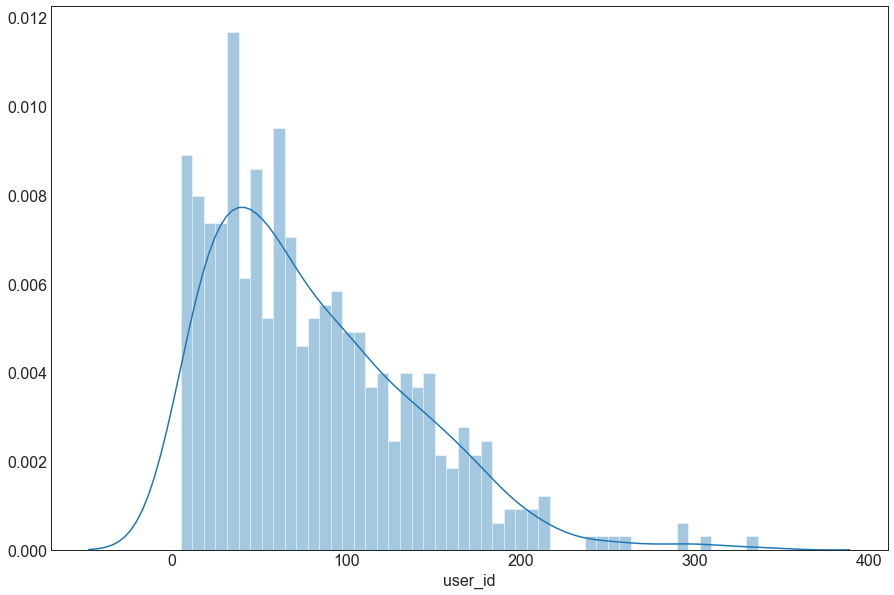

In [11]:
histogram(calls.query('duration == 0')['user_id'].value_counts(), 50, True)

Заполним нули медианной длительность звонка по каждому пользователю.

In [12]:
calls_group_user = calls.groupby('user_id')
calls['duration'] = calls_group_user.duration.apply(lambda x: x.replace(0, x.median()))

### Замена типа данных

Колонка call_date содержащая даты звонков имеет тип object. Преобразуем ее тип в datetime для проведения дальнейшего анализа и обработки.

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

### Обработка дубликатов

In [14]:
data_dublicates(calls)

Количество найденных дубликатов: 0


### Вывод

В датасете не было обнаружено пропусков и дубликатов. Колонка с датами была приведена к соответствующему типу. Нулевы значения в колонке duration были заполены медианными по пользователям.

## Датасет internet

### Обработка пропусков

In [15]:
#посчитаем количество пропусков в колонках
print(internet.isnull().sum())

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64


Данные не содержат пропусков. Проанализируем значения.

In [16]:
data_values(internet)

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


1185_289    1
1465_232    1
1098_422    1
1418_45     1
1381_374    1
           ..
1138_395    1
1224_241    1
1014_448    1
1427_211    1
1102_379    1
Name: id, Length: 149396, dtype: int64
0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64
2018-12-31    1057
2018-12-30     903
2018-12-25     859
2018-12-26     844
2018-12-22     834
              ... 
2018-01-05      14
2018-01-04       9
2018-01-03       6
2018-01-02       3
2018-01-01       3
Name: session_date, Length: 365, dtype: int64
1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype: int64


В данных отсутствуют отрицательные значения, что верно исходя из описания данных. В данных присутствует информация о 492 пользователях. В колонке mb_used (объём потраченного за сессию интернет-трафика (в мегабайтах)) было обнаружено большое количество нулевых значений.

Больше 1/10 всех интернет сессий были с нулевым трафиком. Для дальнейшего анализа необходимо провести предобработку. Проанализируем строки с нулевыми значениями в колонке с потраченным интернет трафиком.

In [17]:
internet.query('mb_used == 0')['user_id'].value_counts()

1204    144
1496    141
1429    125
1119    124
1227    121
       ... 
1084      1
1192      1
1201      1
1016      1
1467      1
Name: user_id, Length: 494, dtype: int64

Интернет сессии с нулевым трафиком присутствуют практически у всех пользователей.

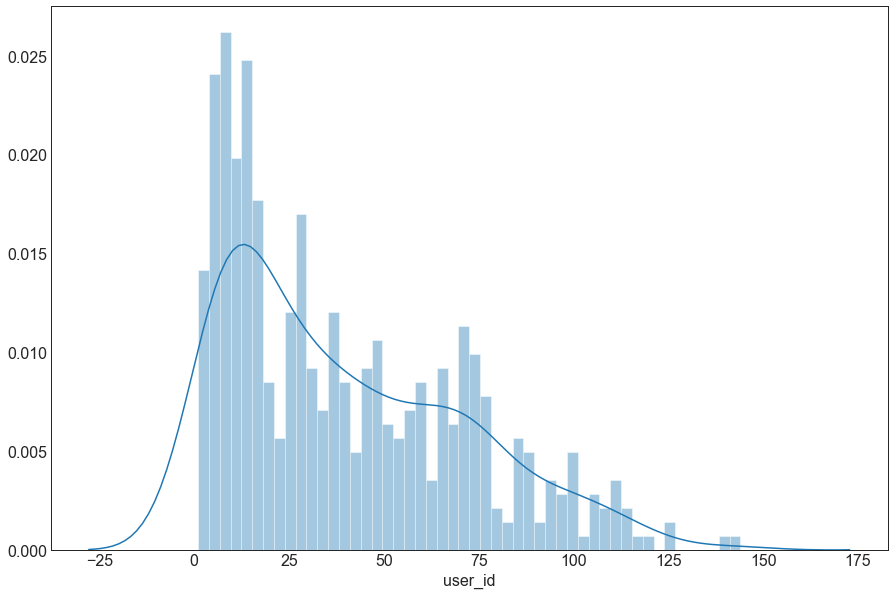

In [18]:
histogram(internet.query('mb_used == 0')['user_id'].value_counts(), 50, True)

Заполним нулевые значения медианным интернет трафиком по каждому пользователю.

In [19]:
internet_group_user = internet.groupby('user_id')
internet['mb_used'] = internet_group_user.mb_used.apply(lambda x: x.replace(0, x.median()))

### Замена типа данных

Колонка mb_used содержащая даты интернет-сессиий имеет тип object. Преобразуем ее тип в datetime для проведения дальнейшего анализа и обработки.

In [20]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

### Обработка дубликатов

In [21]:
data_dublicates(internet)

Количество найденных дубликатов: 0


### Вывод

В датасете не было обнаружено пропусков и дубликатов. Колонка с датами была приведена к соответствующему типу. Нулевые значения в колонке mb_used были заполнены медианными по пользователям.

## Датасет messages

### Обработка пропусков

In [22]:
#посчитаем количество пропусков в колонках
print(messages.isnull().sum())

id              0
message_date    0
user_id         0
dtype: int64


Данные не содержат пропусков. Проанализируем значения.

In [23]:
data_values(messages)

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


1003_99     1
1359_31     1
1060_56     1
1468_8      1
1400_131    1
           ..
1183_132    1
1496_408    1
1272_224    1
1226_244    1
1404_229    1
Name: id, Length: 123036, dtype: int64
2018-12-31    859
2018-12-30    765
2018-12-21    712
2018-12-29    702
2018-12-26    699
             ... 
2018-01-07     12
2018-01-04     10
2018-01-02     10
2018-01-05     10
2018-01-03      4
Name: message_date, Length: 364, dtype: int64
1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1389       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64


In [24]:
# заменим название колонки с id сообщения
messages.rename(columns={'id': 'id_message'}, inplace=True) 

В данных отсутствуют отрицательные значения, что верно исходя из описания данных. В данных присутствует информация о 426 пользователях.

### Замена типа данных

Колонка message_date содержащая даты сообщений имеет тип object. Преобразуем ее тип в datetime для проведения дальнейшего анализа и обработки.

In [25]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

### Обработка дубликатов

In [26]:
data_dublicates(messages)

Количество найденных дубликатов: 0


### Вывод

В датасете не было обнаружено пропусков и дубликатов. Колонка с датами была приведена к соответствующему типу.

## Датасет tariffs

### Обработка пропусков

In [27]:
#посчитаем количество пропусков в колонках
print(tariffs.isnull().sum())

messages_included        0
mg_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64


Данные не содержат пропусков. Проанализируем значения.

In [28]:
data_values(tariffs)

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


50      1
1000    1
Name: messages_included, dtype: int64
30720    1
15360    1
Name: mg_per_month_included, dtype: int64
3000    1
500     1
Name: minutes_included, dtype: int64
550     1
1950    1
Name: rub_monthly_fee, dtype: int64
150    1
200    1
Name: rub_per_gb, dtype: int64
3    1
1    1
Name: rub_per_message, dtype: int64
3    1
1    1
Name: rub_per_minute, dtype: int64
smart    1
ultra    1
Name: tariff_name, dtype: int64


В данных отсутствуют отрицательные значения, что верно исходя из описания данных. Также все колонки имеют только по 2 варианта, что верно, так как мы имеем дело с 2-мя видами тарифов.

### Замена типа данных

Нет необходимости в замене типов данных.

### Обработка дубликатов

In [29]:
data_dublicates(tariffs)

Количество найденных дубликатов: 0


### Вывод

В датасете не было обнаружено пропусков и дубликатов.

## Датасет users

### Обработка пропусков

In [30]:
#посчитаем количество пропусков в колонках
print(users.isnull().sum())

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64


Обнаружено 462 пропуска в колонке churn_date. Проанализируем значения.

In [31]:
data_values(users)

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


1023    1
1194    1
1181    1
1182    1
1183    1
       ..
1362    1
1363    1
1364    1
1365    1
1024    1
Name: user_id, Length: 500, dtype: int64
53    14
42    14
63    13
71    13
64    13
73    12
21    12
40    12
39    11
47    11
29    11
26    11
37    11
41    10
36    10
58    10
45    10
70    10
52    10
51     9
27     9
48     9
50     9
28     9
30     9
24     9
20     9
19     9
56     9
23     9
68     9
66     9
65     9
69     8
62     8
60     8
44     8
55     8
25     7
43     7
67     7
35     7
74     7
32     7
31     7
46     7
75     6
54     6
59     6
18     6
33     5
34     5
38     5
22     5
72     5
49     4
57     4
61     3
Name: age, dtype: int64
2018-12-03    2
2018-12-21    2
2018-10-14    2
2018-10-03    2
2018-12-09    2
2018-12-25    1
2018-09-02    1
2018-10-04    1
2018-11-26    1
2018-10-25    1
2018-12-11    1
2018-12-18    1
2018-09-27    1
2018-11-07    1
2018-12-16    1
2018-11-16    1
2018-09-26    1
2018-11-27    1
2018-11-30    1

В данных отсутствуют отрицательные значения, что верно исходя из описания данных. Согласно описанию churn_date — дата прекращения пользования тарифом. Если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Внесем соответсвующие корректировки.

In [32]:
users['churn_date'] = users['churn_date'].fillna('2018-12-31')

Также мы видим, что общее количество уникальных пользователей составляет 500 человек. В отличие от другие датасетов, в которых количество варьируется. Это означает, что по каким то пользователям в дальнейшем не удастся сопоставить информацию либо частнично, либо полностью.

### Замена типа данных

Колонка reg_date содержащая даты подключения тарифов имеет тип object. Также колонка churn_date содержащая даты прекращения пользования тарифом имеет тип object. Преобразуем их тип в datetime для проведения дальнейшего анализа и обработки.

In [33]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

### Обработка дубликатов

In [34]:
data_dublicates(users)

Количество найденных дубликатов: 0


### Вывод

В датасете не было обнаружено дубликатов. Пропуски в колонке churn_date объясняются действующим тарифом на момент выгрузки данных и были соответственно заполнены.  Колонки с датами были приведены к соответствующему типу.

## Вывод

Были проанализированы данные. Колонки были приведены к их соответствующим типам данных, а также была проведена проверка на наличие дубликатов.

# Шаг 2.2. Подготовка данных <a id = "2.2."> </a>

Посчитаем для каждого пользователя: 

1) количество сделанных звонков и израсходованных минут разговора по месяцам:

In [35]:
# добавляем колонку с месяцем в датасет
data_date_to_month(calls, 'call_date', 'month_code')

# количество сделанных звонков пользователями по месяцам
user_calls_count = (calls
                        .pivot_table(index=['user_id','month_code'], 
                        values='id_call', 
                        aggfunc='count').reset_index())

print(user_calls_count)

      user_id  month_code  id_call
0        1000           5       22
1        1000           6       43
2        1000           7       47
3        1000           8       52
4        1000           9       58
...       ...         ...      ...
3169     1498          10       41
3170     1499           9        9
3171     1499          10       68
3172     1499          11       74
3173     1499          12       69

[3174 rows x 3 columns]


In [36]:
# количество израсходованных пользователями минут разговора по месяцам
user_calls_min = (calls
                        .pivot_table(index=['user_id','month_code'],
                        values='duration', 
                        aggfunc='sum').reset_index())

print(user_calls_min)

      user_id  month_code  duration
0        1000           5    179.11
1        1000           6    246.05
2        1000           7    353.66
3        1000           8    447.97
4        1000           9    509.86
...       ...         ...       ...
3169     1498          10    300.17
3170     1499           9     71.51
3171     1499          10    594.55
3172     1499          11    658.82
3173     1499          12    554.34

[3174 rows x 3 columns]


2) количество отправленных сообщений по месяцам:

In [37]:
# добавляем колонку с месяцем в датасет
data_date_to_month(messages, 'message_date', 'month_code')

# количество отправленных пользователями сообщений по месяцам
user_mess_count = (messages
                        .pivot_table(index=['user_id','month_code'], 
                        values='id_message', 
                        aggfunc='count').reset_index())

print(user_mess_count)

      user_id  month_code  id_message
0        1000           5          22
1        1000           6          60
2        1000           7          75
3        1000           8          81
4        1000           9          57
...       ...         ...         ...
2712     1498          10          42
2713     1499           9          11
2714     1499          10          48
2715     1499          11          59
2716     1499          12          66

[2717 rows x 3 columns]


3) объем израсходованного интернет-трафика по месяцам:

In [38]:
# добавляем колонку с месяцем в датасет
data_date_to_month(internet, 'session_date', 'month_code')

# объем израсходованного пользователями интернет-трафика по месяцам
user_mb_sum = (internet
                        .pivot_table(index=['user_id','month_code'], 
                        values='mb_used', 
                        aggfunc='sum').reset_index())

print(user_mb_sum)

      user_id  month_code   mb_used
0        1000           5   2780.31
1        1000           6  25867.87
2        1000           7  14530.46
3        1000           8  15109.57
4        1000           9  15622.55
...       ...         ...       ...
3198     1498          10  23514.26
3199     1499           9   2113.99
3200     1499          10  21812.11
3201     1499          11  20645.71
3202     1499          12  14396.78

[3203 rows x 3 columns]


4) посчитаем помесячную выручку с каждого пользователя:

In [39]:
# добавляем колонку с месяцем в датасет users
data_date_to_month(users, 'reg_date', 'reg_month')
data_date_to_month(users, 'churn_date', 'churn_month')

# датасет сопоставляющий пользователя, его тариф, начало и окончание его действия
user_tariff = users[['user_id', 'tariff', 'reg_month', 'churn_month']]

# объединяем список пользователей со статистикой по месяцам: 
# 1) по звонкам 
user_stat = user_tariff.merge(user_calls_min, how='outer')
user_stat = (user_stat
                    .merge(user_calls_count, how='outer',
                    left_on=['user_id','month_code'], 
                    right_on=['user_id','month_code']))
# 2) сообщениям
user_stat = (user_stat
                    .merge(user_mess_count, how='outer',
                    left_on=['user_id','month_code'], 
                    right_on=['user_id','month_code']))

# 3) интернет трафику
user_stat = (user_stat
                    .merge(user_mb_sum, how='outer',
                    left_on=['user_id','month_code'], 
                    right_on=['user_id','month_code']))

# 4) объединим с данными по тарифам
user_stat = (user_stat
                    .merge(tariffs, how='outer',
                    left_on='tariff', 
                    right_on='tariff_name'))

На этапе предобработки данных мы выяснили, что информация о пользователях варьируется и по кому-то не удастся сопоставить информацию либо польностью, либо частично. Проанализируем пользователей в свободной таблице у кого отсутствует информация о звонках, сообщениях и интернет трафике.

In [40]:
empty_stat = user_stat.query('(duration != duration)&(id_call != id_call)&(id_message != id_message)&(mb_used != mb_used)')['user_id']
empty_stat

151     1091
197     1106
228     1128
380     1231
554     1328
929     1473
2590    1371
3137    1489
Name: user_id, dtype: int64

Пользователей, по которым отсутствует какая-либо информация, кроме тарифа, даты подключения к тарифу и даты отключения, оказалось 8 человек. Очистим их из сводной таблицы, так как это не повлияет на дальнейший анализ.

In [41]:
user_stat = user_stat.query('user_id not in @empty_stat')

In [42]:
# преобразуем столбец с кодом месяца в тип int
user_stat['month_code'] = user_stat['month_code'].astype('int')

Для того, чтобы посчитать выручку вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика. Полученную сумму умножим на значение из тарифного плана и прибавим абонентскую плату, соответствующую тарифному плану. Для того, чтобы выполнить данные действия мы должны убедится, что информация по используемому тарифу есть по каждому пользователю.

In [43]:
empty_tariff = user_stat.query('tariff != tariff')['user_id']
empty_tariff

3210    1373
3221    1476
Name: user_id, dtype: int64

Всего 2 пользователя с отсутсвующим тарифом. Очистим их из сводной таблицы, так как это не повлияет на дальнейший анализ.

In [44]:
user_stat = user_stat.query('user_id not in @empty_tariff')
user_stat 

,user_id,tariff,reg_month,churn_month,month_code,duration,id_call,id_message,mb_used,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,ultra,5.0,12.0,5,179.11,22.0,22.0,2780.31,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra
1,1000,ultra,5.0,12.0,6,246.05,43.0,60.0,25867.87,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra
2,1000,ultra,5.0,12.0,7,353.66,47.0,75.0,14530.46,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra
3,1000,ultra,5.0,12.0,8,447.97,52.0,81.0,15109.57,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra
4,1000,ultra,5.0,12.0,9,509.86,58.0,57.0,15622.55,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,1498,smart,7.0,10.0,10,300.17,41.0,42.0,23514.26,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,smart
3178,1499,smart,9.0,12.0,9,71.51,9.0,11.0,2113.99,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,smart
3179,1499,smart,9.0,12.0,10,594.55,68.0,48.0,21812.11,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,smart
3180,1499,smart,9.0,12.0,11,658.82,74.0,59.0,20645.71,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,smart


In [45]:
# функция считающая выручку от звонков, сообщений, интернет трафика
def revenue(x,y,z):
    if (y-x)>=0:
        return 0
    if (y-x)<0:
        return -(y-x)*z
    
#функция определяющая абонентскую плату
def fees(x,y,z,m):
    if x <= m <= y:
        return z
    return 0

# посчитаем выручку от звонков
user_stat['revenue_calls'] = (user_stat
                                        .apply(lambda x: 
                                                        revenue(x['duration'], 
                                                        x['minutes_included'], 
                                                        x['rub_per_minute']), axis =  1))
# посчитаем выручку от сообщений
user_stat['revenue_messages'] = (user_stat
                                        .apply(lambda x: 
                                                        revenue(x['id_message'], 
                                                        x['messages_included'], 
                                                        x['rub_per_message']), axis =  1))
# посчитаем выручку от интернет трафика
user_stat['revenue_traffic'] = (user_stat
                                        .apply(lambda x: 
                                                        revenue(x['mb_used'], 
                                                        x['mg_per_month_included'], 
                                                        x['rub_per_gb']/1024), axis =  1))
# посчитаем выручку от абонентской платы
user_stat['fee'] = (user_stat
                            .apply(lambda x: 
                                            fees(x['reg_month'], 
                                            x['churn_month'], 
                                            x['rub_monthly_fee'],
                                            x['month_code']), axis =  1))


#итоговая таблица по выручке помесячно
user_revenue = user_stat[['user_id', 
                             'tariff', 
                             'month_code',
                             'revenue_calls', 
                             'revenue_messages', 
                             'revenue_traffic', 
                             'fee']].reset_index()

#заполним оставшиеся NaN значения нулями
user_revenue['revenue_messages'] = user_revenue['revenue_messages'].fillna(0)
user_revenue['revenue_traffic'] = user_revenue['revenue_traffic'].fillna(0)

#добавим total по выручке
user_revenue['total_revenue'] = (user_revenue['revenue_calls'] + 
                                 user_revenue['revenue_messages'] +
                                 user_revenue['revenue_traffic'] +
                                 user_revenue['fee'])
print(user_revenue)

      index  user_id tariff  month_code  revenue_calls  revenue_messages  \
0         0     1000  ultra           5           0.00               0.0   
1         1     1000  ultra           6           0.00               0.0   
2         2     1000  ultra           7           0.00               0.0   
3         3     1000  ultra           8           0.00               0.0   
4         4     1000  ultra           9           0.00               0.0   
...     ...      ...    ...         ...            ...               ...   
3150   3177     1498  smart          10           0.00               0.0   
3151   3178     1499  smart           9           0.00               0.0   
3152   3179     1499  smart          10         283.65               0.0   
3153   3180     1499  smart          11         476.46              27.0   
3154   3181     1499  smart          12         163.02              48.0   

      revenue_traffic     fee  total_revenue  
0            0.000000  1950.0    1950.00

# Шаг 3. Анализ данных <a id = "3."> </a>

Проанализируем поведение клиентов оператора, исходя из выборки

1) Проанализируем количество произведенных звонков помесячно для каждого тарифа.

In [46]:
call_tariff = user_stat.pivot_table(index='month_code', columns='tariff', values='id_call').round(1)
call_tariff

tariff,smart,ultra
month_code,,
1,28.5,59.4
2,40.9,41.5
3,55.0,67.7
4,51.8,66.5
5,55.6,76.0
6,55.9,69.3
7,57.0,78.5
8,59.5,74.2
9,60.0,77.3


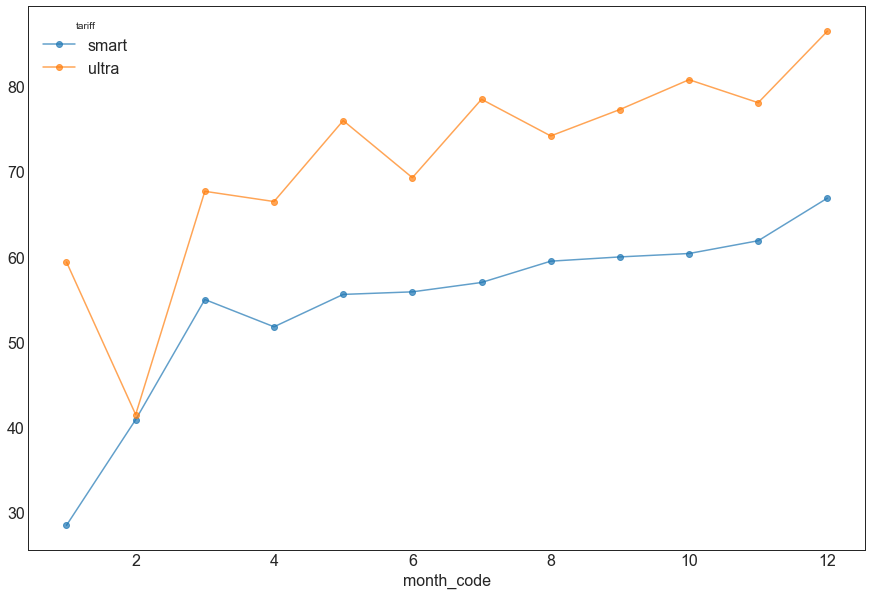

In [47]:
graphic(call_tariff, 'o-', 0.7)

Из полученного графика мы наблюдаем, что в среднем количество звонков имеет восходящий тренд от начала года к его концу. Среднее количество звонков в феврале у каждого тарифа было одинаковое. Резкое снижение среднего количества звонков (~ на 18 шт.) с января по февраль наблюдается по тарифу ultra.

In [48]:
print('Рост количества звонков по тарифу ultra составил: {:.0%}'
      .format(growth(call_tariff, 'ultra')))
print('Рост количества звонков по тарифу smart составил: {:.0%}'
      .format(growth(call_tariff, 'smart')))

Рост количества звонков по тарифу ultra составил: 46%
Рост количества звонков по тарифу smart составил: 135%


In [49]:
print('Среднее количество звонков по тарифу ultra: {:.2f}'. format(user_stat.query('tariff == "ultra"')['id_call'].mean()))
print('Среднее количество звонков по тарифу smart: {:.2f}'. format(user_stat.query('tariff == "smart"')['id_call'].mean()))
print('Среднее количество звонков: {:.2f}'. format(user_stat['id_call'].mean()))

Среднее количество звонков по тарифу ultra: 76.08
Среднее количество звонков по тарифу smart: 58.90
Среднее количество звонков: 64.04


Расчитаем дисперсию и стандартное отклонение показателя количество звонков ежемесячно.

In [50]:
call_var = np.var(user_stat['id_call'], ddof=1)
call_std = np.sqrt(call_var)

print('Дисперсия: {:.2f}'. format(call_var))
print('Стандартное отклонение: {:.2f}'. format(call_std))

Дисперсия: 1060.82
Стандартное отклонение: 32.57


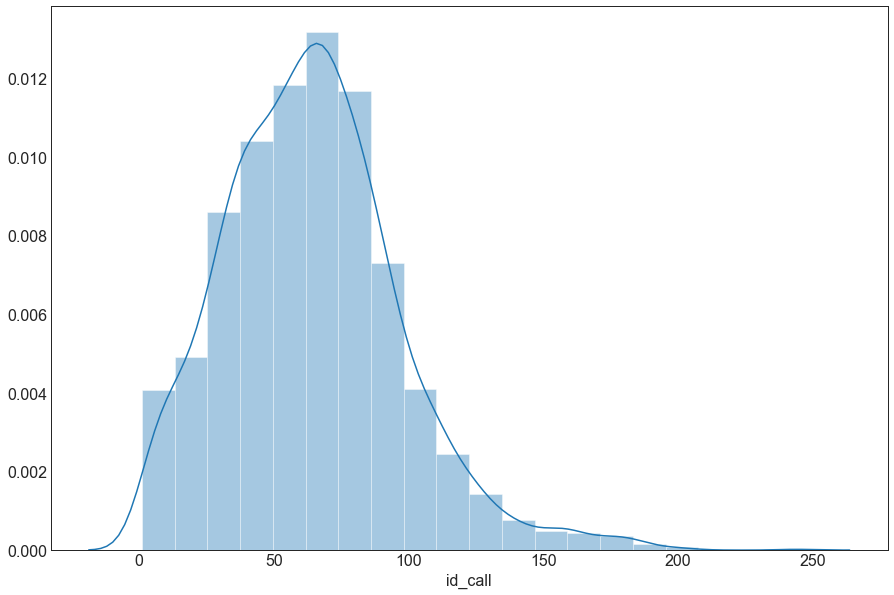

In [51]:
histogram(user_stat['id_call'], 20, True)

Данные в колонке id_call, показывающие среднее количество звонков по пользователям по месяцам, имеют распредение близкое к нормальному. Чаще всего пользователи совершают от 60 до 70 звонков в месяц. 

2) Проанализируем длительность произведенных звонков помесячно для каждого тарифа.

In [52]:
duration_calls_tariff = user_stat.pivot_table(index='month_code', columns='tariff', values='duration').round(1)
duration_calls_tariff

tariff,smart,ultra
month_code,,
1,234.5,482.4
2,334.0,326.4
3,435.5,543.5
4,408.6,523.8
5,434.2,597.1
6,441.7,549.3
7,452.7,623.8
8,471.8,587.2
9,476.7,615.0


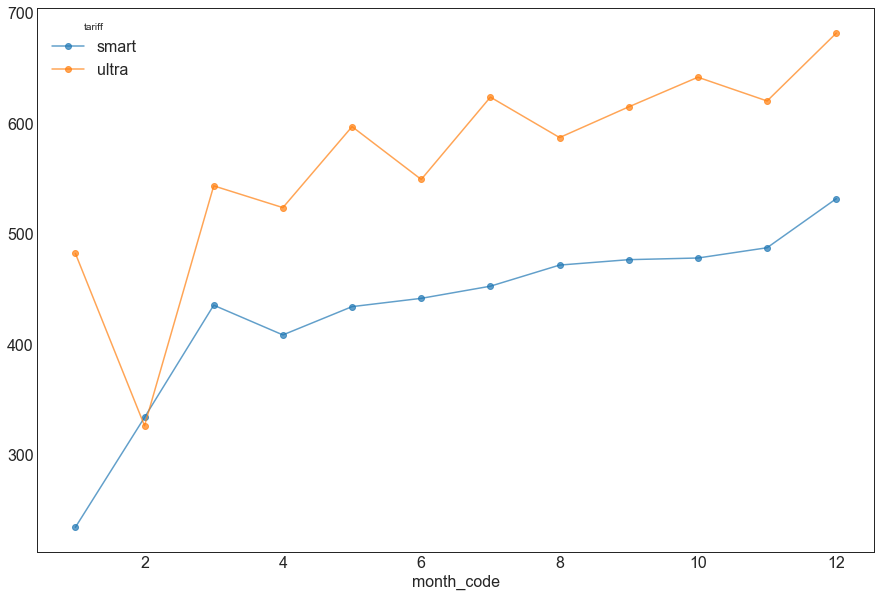

In [53]:
graphic(duration_calls_tariff, 'o-', 0.7)

График средней продолжительности звонков повторяет график среднего количества звонков. В среднем продолжительность звонков у каждого тарифа растет и достигает своего максимума в конце года. У тарифа ultra также наблюдается резкое снижение продолжительности звонков с января по февраль (~ на 124 минуты).

In [54]:
print('Рост продолжительности звонков по тарифу ultra составил: {:.0%}'
      .format(growth(duration_calls_tariff, 'ultra')))
print('Рост продолжительности звонков по тарифу smart составил: {:.0%}'
      .format(growth(duration_calls_tariff, 'smart')))

Рост продолжительности звонков по тарифу ultra составил: 41%
Рост продолжительности звонков по тарифу smart составил: 127%


In [55]:
print('Средняя продолжительность звонков по тарифу ultra: {:.2f}'. format(user_stat.query('tariff == "ultra"')['duration'].mean()))
print('Средняя продолжительность звонков по тарифу smart: {:.2f}'. format(user_stat.query('tariff == "smart"')['duration'].mean()))
print('Средняя продолжительность звонков: {:.2f}'. format(user_stat['duration'].mean()))

Средняя продолжительность звонков по тарифу ultra: 602.94
Средняя продолжительность звонков по тарифу smart: 466.71
Средняя продолжительность звонков: 507.43


Расчитаем дисперсию и стандартное отклонение показателя длительности звонков ежемесячно.

In [56]:
call_duration_var = np.var(user_stat['duration'], ddof=1)
call_duration_std = np.sqrt(call_duration_var)

print('Дисперсия: {:.2f}'. format(call_duration_var))
print('Стандартное отклонение: {:.2f}'. format(call_duration_std))

Дисперсия: 67821.79
Стандартное отклонение: 260.43


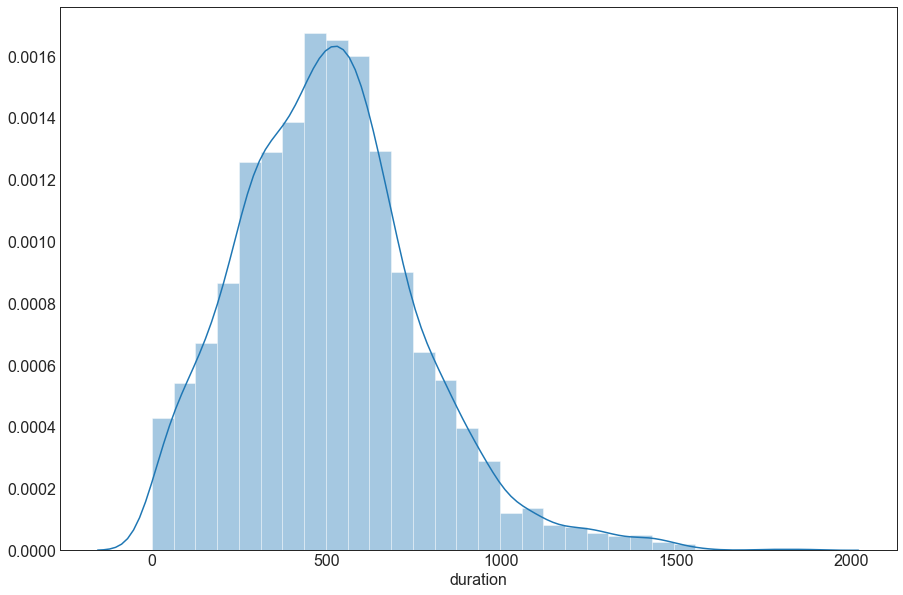

In [57]:
histogram(user_stat['duration'], 30, True)

Данные в колонке duration, показывающие среднюю продолжительность звонков по пользователям по месяцам, имеют распределение близкое к нормальному.

Основная масса пользователей совершает звонки общей длительностью от 250 до 750 минут в месяц.

3) Проанализируем количество отправленных сообщений помесячно для каждого тарифа.

In [58]:
message_tariff = user_stat.pivot_table(index='month_code', columns='tariff', values='id_message').round(1)
message_tariff

tariff,smart,ultra
month_code,,
1,19.7,43.4
2,27.7,32.9
3,35.3,47.8
4,35.7,45.4
5,39.0,50.3
6,38.5,51.4
7,38.9,61.8
8,38.8,59.3
9,39.2,63.8


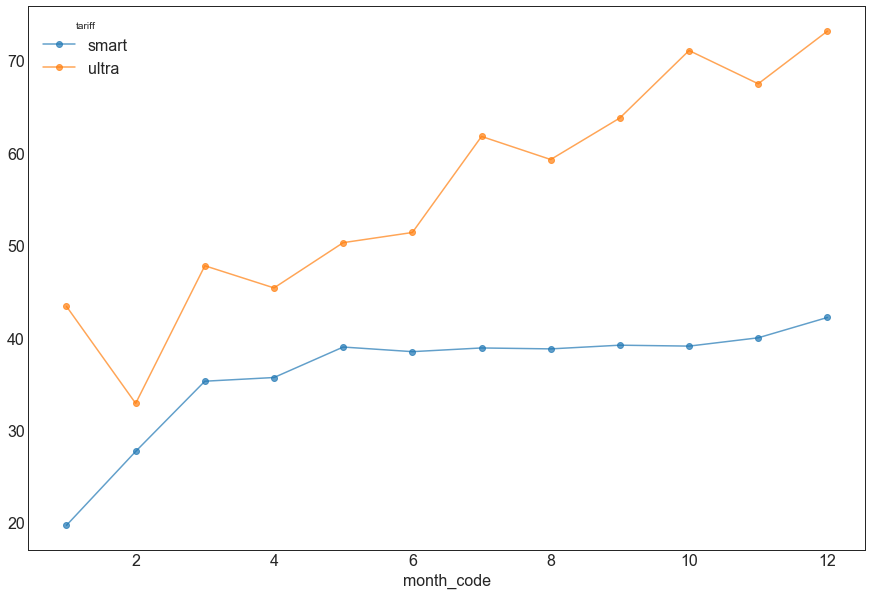

In [59]:
graphic(message_tariff, 'o-', 0.7)

Среднее количество отправленных сообщений по тарифу ultra растет с начала года и достигает своего максимума в декабре. Также мы наблюдаем резкое снижение по тарифу ultra с января по февраль (~ на 10 сообщений). Среднее количество сообщений по тарифу smart растет с начала года и в мае рост останавливается и остается до конца года в пределах 39-42 сообщений.

In [60]:
print('Рост количества сообщений по тарифу ultra составил: {:.0%}'
      .format(growth(message_tariff, 'ultra')))
print('Рост количества сообщений по тарифу smart составил: {:.0%}'
      .format(growth(message_tariff, 'smart')))

Рост количества сообщений по тарифу ultra составил: 69%
Рост количества сообщений по тарифу smart составил: 114%


In [61]:
print('Среднее количество сообщений по тарифу ultra: {:.2f}'. format(user_stat.query('tariff == "ultra"')['id_message'].mean()))
print('Среднее количество сообщений по тарифу smart: {:.2f}'. format(user_stat.query('tariff == "smart"')['id_message'].mean()))
print('Среднее количество сообщений: {:.2f}'. format(user_stat['id_message'].mean()))

Среднее количество сообщений по тарифу ultra: 61.79
Среднее количество сообщений по тарифу smart: 38.70
Среднее количество сообщений: 45.25


Расчитаем дисперсию и стандартное отклонение показателя количество сообщений ежемесячно.

In [62]:
messages_var = np.var(user_stat['id_message'], ddof=1)
messages_std = np.sqrt(messages_var)

print('Дисперсия: {:.2f}'. format(messages_var))
print('Стандартное отклонение: {:.2f}'. format(messages_std))

Дисперсия: 1188.95
Стандартное отклонение: 34.48


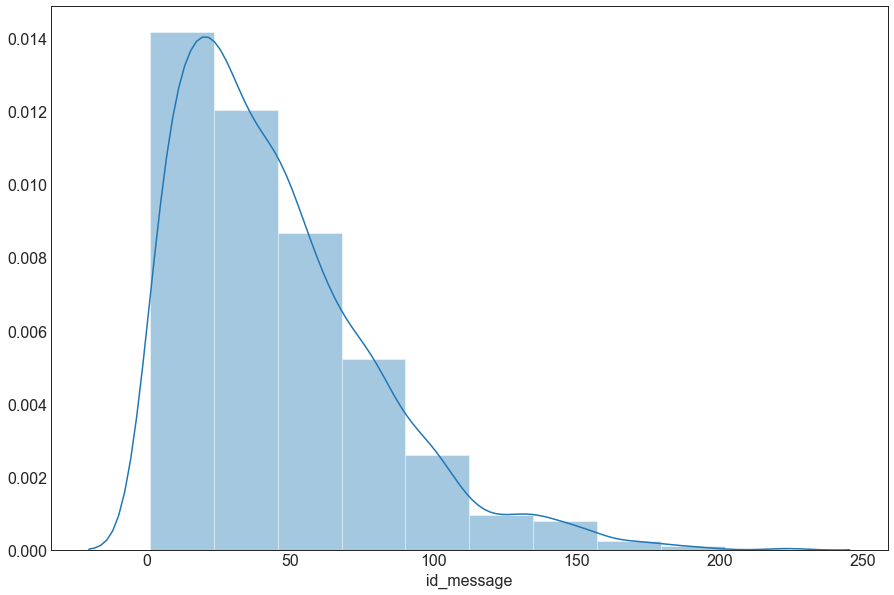

In [63]:
histogram(user_stat['id_message'], 10, True)

Данные в колонке id_message, показывающие среднее количество сообщений, которое пользователи отправляют ежемесячно, имеют распределение близкое к распределению Пуассона. Чаще всего пользователи отправляют не более 50 сообщений в месяц.

4) Проанализируем объем используемого интернет трафика помесячно для каждого тарифа.

In [64]:
internet_tariff = user_stat.pivot_table(index='month_code', columns='tariff', values='mb_used').round(1)
internet_tariff

tariff,smart,ultra
month_code,,
1,9723.0,13702.9
2,13222.4,13598.9
3,17192.3,18306.0
4,15370.6,18141.0
5,17949.1,20968.1
6,18112.0,20066.3
7,18060.2,21683.7
8,19101.6,20659.0
9,18663.9,20193.2


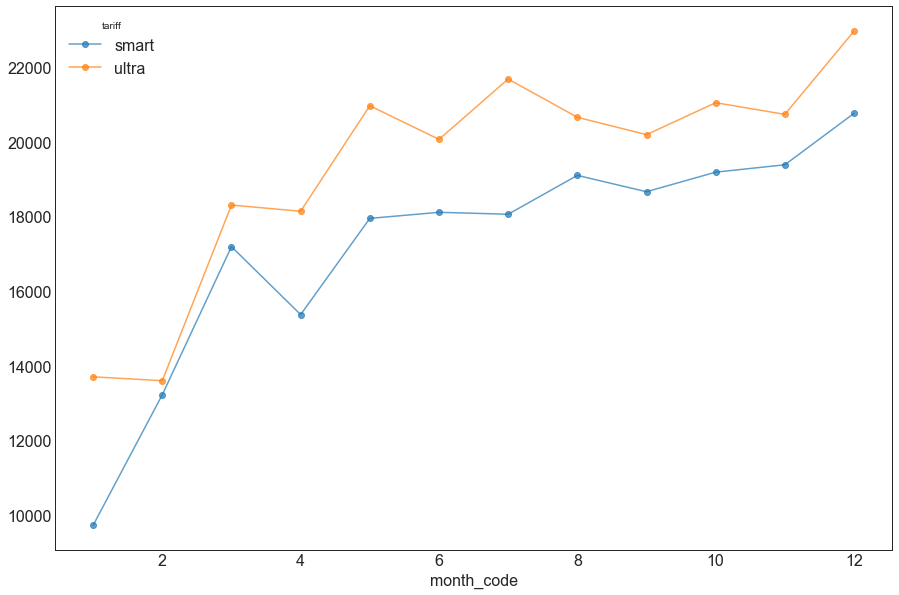

In [65]:
graphic(internet_tariff, 'o-', 0.7)

Среднний объем интернет трафика по обоим тарифам рос с начала года и достиг максимума в конце.

In [66]:
print('Рост интернет трафика по тарифу ultra составил:{:.0%}'
      .format(growth(internet_tariff, 'ultra')))
print('Рост интернет трафика по тарифу smart составил:{:.0%}'
      .format(growth(internet_tariff, 'smart')))

Рост интернет трафика по тарифу ultra составил:68%
Рост интернет трафика по тарифу smart составил:114%


In [67]:
print('Средний объем потребляемого интернет трафика по тарифу ultra: {:.2f} ГБ'. format(user_stat.query('tariff == "ultra"')['mb_used'].mean()/1024))
print('Средний объем потребляемого интернет трафика по тарифу smart: {:.2f} ГБ'. format(user_stat.query('tariff == "smart"')['mb_used'].mean()/1024))
print('Средний объем потребляемого интернет трафика: {:.2f} ГБ'. format(user_stat['mb_used'].mean()/1024))

Средний объем потребляемого интернет трафика по тарифу ultra: 20.10 ГБ
Средний объем потребляемого интернет трафика по тарифу smart: 18.13 ГБ
Средний объем потребляемого интернет трафика: 18.72 ГБ


Расчитаем дисперсию и стандартное отклонение показателя интернет трафика ежемесячно.

In [68]:
mb_used_var = np.var(user_stat['mb_used'], ddof=1)
mb_used_std = np.sqrt(mb_used_var)

print('Дисперсия: {:.2f}'. format(mb_used_var))
print('Стандартное отклонение: {:.2f}'. format(mb_used_std))

Дисперсия: 63671789.97
Стандартное отклонение: 7979.46


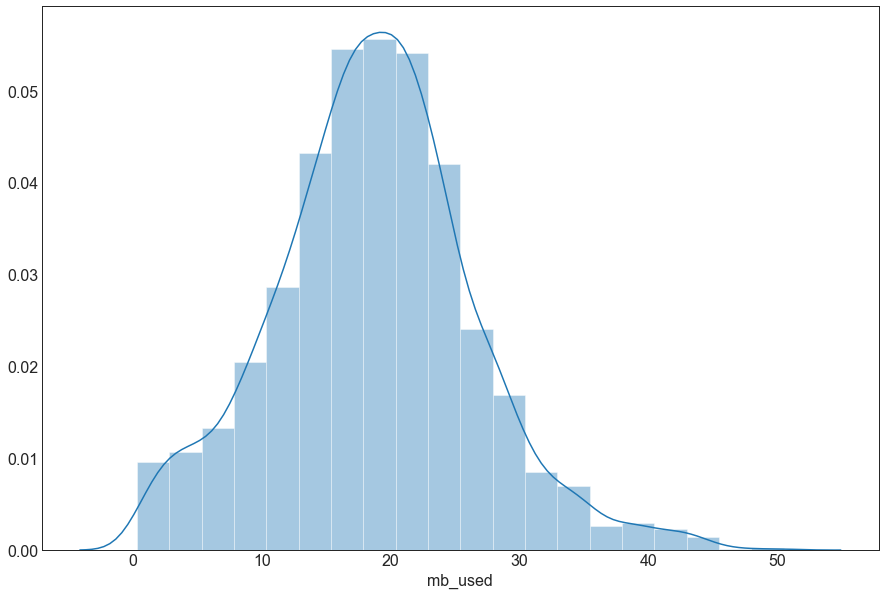

In [69]:
histogram(user_stat['mb_used']/1024, 20, True)

Данные в колонке mb_used, показывающие средний объем интернет трафика, который пользователи используют ежемесячно, имеют распределение распределение близкое к нормальному. Пользователи зачастую используют от 12,5 до 25 ГБ в месяц.

### Вывод

Мы проанализировали показатели по количеству звонков, сообщений, продолжительности звонков и объему интернет трафика помесячно.  Мы наблюдаем в среднем рост показателей в течение 2018 года. По тарифу ultra показатели падают или перестают расти с явнаря по февраль, но затем снова возобновляют рост. Интенсивнее всех растут показатели по пользователям тарифа smart.

# Шаг 4. Проверка гипотез <a id = "4."> </a>

1) Проверим гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Сформируем нулевую гипотезу H₀. H₀ всегда формулируется так, чтобы использовать знак равенства. Звучать она будет так: "средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается." Следовательно алтернативная гипотеза H₁ будет звучать как: "cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается". 

Определим 2 выборки для проверки гипотез.

In [70]:
# средняя выручка по тарифу ultra
sample_ultra = user_revenue.query('tariff == "ultra"')['total_revenue']

# выручка по тарифу smart
sample_smart = user_revenue.query('tariff == "smart"')['total_revenue']

Уровень значимости - это вероятность того, что мы сочли различия существенными, а они на самом деле случайны. Установим критический уровень статистической значимости на общепринятом уровне для двух тестов = .05. Для решения вопроса о принятии или отвержении нулевой гипотезы будем использовать p-value Проверим гипотезы.

In [71]:
# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
alpha_1 = .05 

# указваем параметр equal_var функции st.ttest_ind равным "True", так как обе выборки взяты из одной генеральной совокупности
results_1 = st.ttest_ind(
    sample_ultra, 
    sample_smart, equal_var = True)

print('p-значение:', results_1.pvalue)

if (results_1.pvalue < alpha_1):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.045923488203983e-36
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что средняя выручка от разных тарифов неодинакова и с вероятностью близкой к нулю такое различие можно получить случайно. Из этого следует вывод о большом различие между средней выручкой 2-х тарифов. Взглянем на данные.

In [72]:
tariff_revenue = user_revenue.pivot_table(index='month_code', columns='tariff', values='total_revenue').round(1)
tariff_revenue

tariff,smart,ultra
month_code,,
1,818.9,1950.0
2,989.8,1996.4
3,1449.2,2045.3
4,1204.3,2024.3
5,1524.2,2102.9
6,1541.9,2065.0
7,1574.4,2148.1
8,1704.4,2120.6
9,1612.0,2041.6


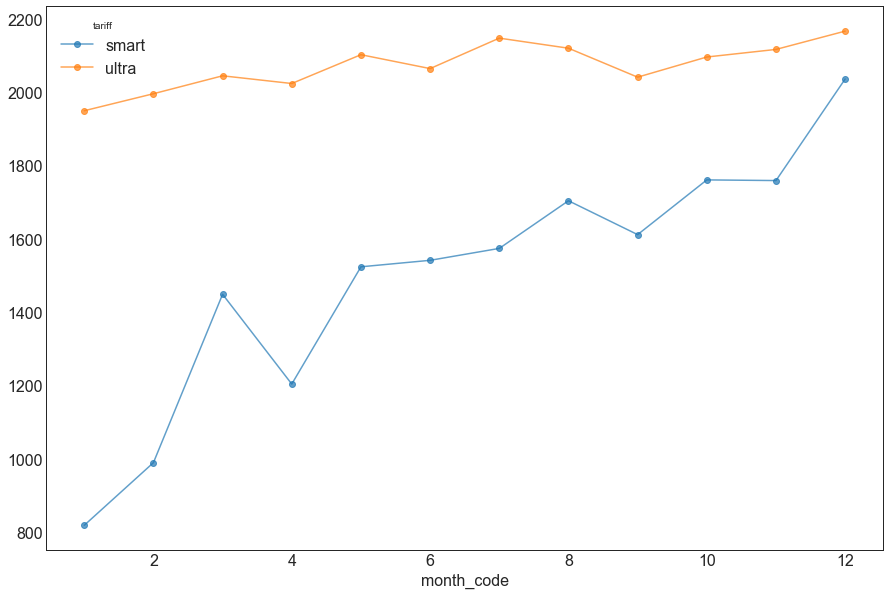

In [73]:
graphic(tariff_revenue, 'o-', 0.7)

2) Проверим гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Сформируем нулевую гипотезу H₀. Звучать она будет так: "средняя выручка от пользователей из Москвы не отличается от средней выручки по регионам." Следовательно алтернативная гипотеза H₁ будет звучать как: "средняя выручка от пользователей из Москвы отличается от средней выручки по регионам".

Для начала добавим в датасет информацию о том, в какой регионе проживает пользователь.

In [74]:
# датасет, который соотносит пользователя и его город проживания
user_city = users[['user_id', 'city']]

# добавляет город к сводному датасету
user_revenue = (user_revenue
                    .merge(user_city, how='left',
                    left_on=['user_id'], 
                    right_on=['user_id']))

Определим выборки для проверки гипотез.

In [75]:
# средняя выручка по Москве
sample_Moscow = user_revenue.query('city == "Москва"')['total_revenue']

# средняя выручка по другим регионам
sample_Regions = user_revenue.query('tariff != "Москва"')['total_revenue']

Проверим гипотезы.

In [76]:
# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу 
alpha_2 = .05 

# указваем параметр equal_var функции st.ttest_ind равным "True", так как обе выборки взяты из одной генеральной совокупности
results_2 = st.ttest_ind(
    sample_Moscow, 
    sample_Regions, equal_var = True)

print('p-значение:', results_2.pvalue)

if (results_2.pvalue < alpha_2):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8824679993456394
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средняя выручка чпо Москве и регионам неодинакова, с вероятностью в почти 88% такое различие можно получить случайно. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средней выручкой по Москве и регионам.

### Вывод

В ходе анализа нам удалось опровергнуть гипотезу о равенстве средей выручки от тарифа smart и ultra. Различие между выручкой по 2-м тарифам велико. Но несмотря на это средняя выручка по тарифу smart росла на протяжении года и стала приближаться к средней выручке по тарифу ultra. Также нам удалось подтвердить гипотезу о равенстве средней выручки от Московских и региональных пользователей. Несмотря на то, что пользователи Москвы наиболее платежеспособны, в среднем ее выручка равна средней выручке регионов.

# Шаг 5. Общий вывод <a id = "5."> </a>

Была проведена обработка исходных данных от дубликатов, пропущенных и нулевых значений. Был выявлен недочет в полученных данных, а имеено то, что данные по некоторым пользователям отсутствовали. Анализ действий пользователей по тарифам показал, что в среднем пользователи каждого тарифа стали чаще и дольше звонить, стали отправлять больше сообщения и актвинее использовать интернет. Нам удалось выяснить, что активность пользователей тарифа smart растет быстрее, чем у пользователей тарифа ultra в среднем 2,3 раза. В ходе анализа нам удалось опровергнуть гипотезу о равенстве средей выручки от тарифа smart и ultra, а также подтвердить гипотезу о равенстве средней выручки от Московских и региональных пользователей. В итоге мы видим, что тариф ultra приносит в среднем больше выручку, чем тариф smart. Однако темп роста активности пользователей у тарифа smart больше в разы и средняя выручка по тарифу smart начинает приближаться к средней выручке по тарифу ultra. Также мы видим, что активность пользователей по тарифу ultra проседает в феврале по всем показателям. С целью увеличения выручки и активности пользователей предлагаем сформировать новый рекламный бюджет для привлечения новых пользователей по тарифу ultra, как новых, так и среди пользователей тарифа smart.